In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as pypl
import seaborn as sns
# from sklearn.datasets import load_iris   optional if the above lib doesn't fetch 


### day1

In [2]:
data=pd.read_csv("Salary_Data.csv")
data


,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891
5,2.9,23.0,56642
6,3.0,23.0,60150
7,3.2,23.3,54445
8,3.2,23.3,64445
9,3.7,23.6,57189


In [3]:
data.head() #takes the first 5 elemetns of the dataset


,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [4]:
x=data.iloc[:,29:2]
y=data.iloc


In [5]:
#krishna nair yt 
#for checking accuracy and error of values we use matrices
# we use the confusion matric which uses the actual and predicted values to make a 2x2 matrix which helps us get 4 values 
# tp,fp
#fn,fp

In [6]:
#accuracy and error are not everything there can be such values that the accuracy and error values fail in practical usage while they are applicable for both the model and actuality
# we want to minimze cases where it is a false negative 
#basically we want to minimize cases where the actuality might be positive and model is negative 

In [11]:
data = sns.load_dataset('iris') 

In [12]:
data  

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
data['species']=data['species'].map({ "setosa": 0 , "versicolor": 1 , "virginica": 2 })

In [15]:
data["species"].unique()

array([0, 1, 2])

### Fetch input and output from the dataset

In [16]:
x=data.iloc[0:,:-1] #fetches rows from 0th row and for the columns it starts from -2 also this takes the input columns and all the rows 


In [17]:
y=data.iloc[:,-1]  #output column taken separately 

In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [19]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Split data in train and test variables

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,train_size=0.70,random_state=1)  #value of random state must be a positive integer 

### Apply Algorithm 

In [22]:
from sklearn.tree import DecisionTreeClassifier  #in classifier ,instead of having a continuous value we have specific values gnerally 2 for true and false 


In [34]:
model=DecisionTreeClassifier(max_depth=2)  # we use max depth for pruning 

In [35]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [36]:
pypl.figure(figsize=(10,15))
from sklearn import tree

<Figure size 1000x1500 with 0 Axes>

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

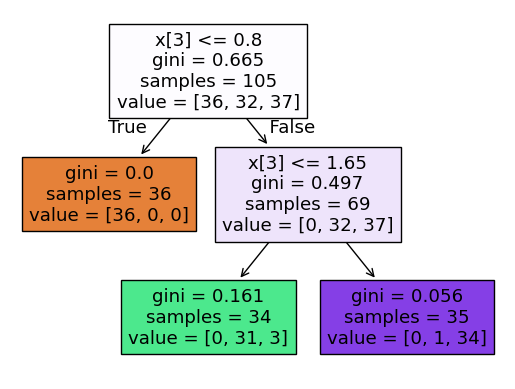

In [37]:
tree.plot_tree(model,filled=True)

##IN THE Below dig we use the last tuple as the measure of which species has which flowers since the assigened order in the beginnig was [0,1,2]=[setosa,versicolor,virginica]

In [38]:
y_pred=model.predict(x_test)


In [43]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [45]:
print(confusion_matrix(y_test,y_pred))

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [46]:
print(accuracy_score(y_test,y_pred))

0.9555555555555556
